In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string # For punctuation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import warnings
warnings.filterwarnings('ignore')
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
#nltk.download('punkt_tab')

In [3]:
#pip install wordcloud

In [4]:
import nltk
# Download necessary NLTK data

     
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [5]:
###                               Phase1: Data Exploration and Cleaning
df = pd.read_csv('C:/Users/USER/Downloads/fake.csv')
df.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null  int64  
 16  like

In [7]:
df.isnull().sum()

uuid                     0
ord_in_thread            0
author                2424
published                0
title                  680
text                    46
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3643
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

In [8]:
# 1. 'author' column
# Strategy: Fill with 'unknown' as it's a categorical/textual feature.
# A missing author could potentially be a feature in itself for fake news detection.
df['author'].fillna('unknown', inplace=True)
print(f"Missing values in 'author' after filling: {df['author'].isnull().sum()}")

Missing values in 'author' after filling: 0


In [9]:
# 2. 'title' column
# Strategy: Fill with 'No Title' or an empty string. The title is important for NLP.
# An empty title could also be a subtle indicator.
df['title'].fillna('No Title', inplace=True)
print(f"Missing values in 'title' after filling: {df['title'].isnull().sum()}")


Missing values in 'title' after filling: 0


In [10]:
# 3. 'text' column
# Strategy: Fill with an empty string ''. This is crucial for NLP processing to avoid errors.
# We explicitly handle this in the text cleaning function as well, but it's good practice here.
df['text'].fillna('', inplace=True)
print(f"Missing values in 'text' after filling: {df['text'].isnull().sum()}")

Missing values in 'text' after filling: 0


In [11]:
# 4. 'country' column
# Strategy: Fill with 'unknown' for categorical data.
# Missing country might indicate a less transparent source.
df['country'].fillna('unknown', inplace=True)
print(f"Missing values in 'country' after filling: {df['country'].isnull().sum()}")


Missing values in 'country' after filling: 0


In [12]:
# 5. 'domain_rank' column
# Strategy: This is numerical. Let's use the median as it's less sensitive to outliers
# compared to the mean, which is often a good choice for skewed distributions.
# Alternatively, filling with 0 or a very large number if missing implies "no rank" or "very low rank".
median_domain_rank = df['domain_rank'].median()
df['domain_rank'].fillna(median_domain_rank, inplace=True)
print(f"Missing values in 'domain_rank' after filling: {df['domain_rank'].isnull().sum()}")

Missing values in 'domain_rank' after filling: 0


In [13]:
# 6. 'thread_title' column
# Strategy: Similar to 'title', fill with 'No Thread Title'.
df['thread_title'].fillna('No Thread Title', inplace=True)
print(f"Missing values in 'thread_title' after filling: {df['thread_title'].isnull().sum()}")


Missing values in 'thread_title' after filling: 0


In [14]:
# 7. 'main_img_url' column
# Strategy: Fill with 'no_image_url'. The presence or absence of an image could be a feature.
df['main_img_url'].fillna('no_image_url', inplace=True)
print(f"Missing values in 'main_img_url' after filling: {df['main_img_url'].isnull().sum()}")



Missing values in 'main_img_url' after filling: 0


In [15]:
print("\nMissing values after handling all columns:")
print(df.isnull().sum())

print("\nUpdated DataFrame Info:")
df.info()


Missing values after handling all columns:
uuid                  0
ord_in_thread         0
author                0
published             0
title                 0
text                  0
language              0
crawled               0
site_url              0
country               0
domain_rank           0
thread_title          0
spam_score            0
main_img_url          0
replies_count         0
participants_count    0
likes                 0
comments              0
shares                0
type                  0
dtype: int64

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              12999 non-null  object 
 3   published           12999 non-null  object 
 4   title               12999 non-

In [16]:
# Initialize NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):
        return "" # Ensure input is string, though we already filled NaNs with ''
    text = text.lower() # Convert to lowercase

    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove HTML tags if present (common in scraped data)
    text = re.sub(r'<[^>]+>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    words = word_tokenize(text)

    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 1] # Remove single character words

    return " ".join(words)



In [17]:
# Apply the cleaning function to the 'text' column
# Make sure to run this after handling missing values in 'text' (filling with '')
df['cleaned_text'] = df['text'].apply(clean_text)
df['cleaned_text'].head()


0    print pay back money plus interest entire fami...
1    attorney general loretta lynch plead fifth bar...
2    red state fox news sunday reported morning ant...
3    email kayla mueller prisoner tortured isi chan...
4    email healthcare reform make america great sin...
Name: cleaned_text, dtype: object

In [18]:
print("Text cleaning complete. Displaying first 5 cleaned texts:")
for i, text in enumerate(df['cleaned_text'].head()):
    print(f"Original Text (first 100 chars): {df['text'].iloc[i][:100]}...")
    print(f"Cleaned Text: {text}\n")

Text cleaning complete. Displaying first 5 cleaned texts:
Original Text (first 100 chars): Print They should pay all the back all the money plus interest. The entire family and everyone who c...
Cleaned Text: print pay back money plus interest entire family everyone came need deported asap take two year bust go …another group stealing government taxpayer group somali stole four million government benefit month reported numerous case like one muslim refugeesimmigrants commit fraud scamming system…it way control related

Original Text (first 100 chars): Why Did Attorney General Loretta Lynch Plead The Fifth? Barracuda Brigade 2016-10-28 Print The admin...
Cleaned Text: attorney general loretta lynch plead fifth barracuda brigade print administration blocking congressional probe cash payment iran course need plead th either recall refuse answer plain deflects question straight corruption finest percentfedupcom talk covering as loretta lynch plead fifth avoid incriminating payment iran…cor

In [19]:
# You might also want to clean the 'title' and 'thread_title' for better feature extraction later
df['cleaned_title'] = df['title'].apply(clean_text)
df['cleaned_thread_title'] = df['thread_title'].apply(clean_text)

In [20]:
df['cleaned_title'].head()

0              muslim busted stole million gov benefit
1           attorney general loretta lynch plead fifth
2    breaking weiner cooperating fbi hillary email ...
3    pin drop speech father daughter kidnapped kill...
4    fantastic trump point plan reform healthcare b...
Name: cleaned_title, dtype: object

In [21]:
df['cleaned_thread_title'].head()

0              muslim busted stole million gov benefit
1           attorney general loretta lynch plead fifth
2    breaking weiner cooperating fbi hillary email ...
3    pin drop speech father daughter kidnapped kill...
4    fantastic trump point plan reform healthcare b...
Name: cleaned_thread_title, dtype: object

In [22]:
df.shape

(12999, 23)

In [23]:
###                           Phase 2: Feature Engineering
# Word Count
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
print(f"Word count added. Sample: {df[['text', 'word_count']].head()}")

# Character Count (excluding spaces) - can sometimes be useful
df['char_count'] = df['cleaned_text'].apply(lambda x: len(x.replace(" ", "")))
print(f"Character count added. Sample: {df[['text', 'char_count']].head()}")

Word count added. Sample:                                                 text  word_count
0  Print They should pay all the back all the mon...          45
1  Why Did Attorney General Loretta Lynch Plead T...         161
2  Red State : \nFox News Sunday reported this mo...         128
3  Email Kayla Mueller was a prisoner and torture...          28
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...         193
Character count added. Sample:                                                 text  char_count
0  Print They should pay all the back all the mon...         270
1  Why Did Attorney General Loretta Lynch Plead T...        1094
2  Red State : \nFox News Sunday reported this mo...         799
3  Email Kayla Mueller was a prisoner and torture...         165
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...        1285


In [24]:
 fake_or_biased_types = df['type'].unique()
 fake_or_biased_types   

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

In [41]:

# Identify the labels for fake/biased news. You need to inspect your 'type' column unique values.
# Example: If 'bs' is for 'fake/biased source', 'fake' for 'fake news', 'bias' for 'biased'.
# For demonstration, let's assume 'bs' is a key indicator for "fake or biased content".
# You might want to combine multiple 'type' values if they all represent misinformation.

# Let's check unique types first to make an informed decision:
print("Unique values in 'type' column:", df['type'].unique())

# Define what constitutes 'fake_or_biased_types' based on your unique values
# For example, if your unique types include 'bs', 'fake', 'conspiracy', etc.
# Adjust this list based on what you find in df['type'].unique()
fake_or_biased_types = ['bias' 'conspiracy' 'fake' 'bs' 'satire' 'hate' 'junksci' 'state'] # Example types, adjust as needed

# Filter for articles tagged as fake or biased
fake_news_df = df[df['type'].isin(fake_or_biased_types)]

if not fake_news_df.empty:
    all_fake_news_words = " ".join(fake_news_df['cleaned_text'].dropna())

    if all_fake_news_words: # Ensure there's text to generate a word cloud from
        wordcloud = WordCloud(width=1000, height=500, background_color='white',
                              collocations=False, # Set to False to prevent repeating words
                              min_font_size=10).generate(all_fake_news_words)

        plt.figure(figsize=(15, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Frequently Occurring Terms in Fake/Biased News Articles', fontsize=20)
        plt.show()
    else:
        print("No text found for the specified fake/biased news types to generate a word cloud.")
else:
    print("No articles found matching the specified fake/biased news types for word cloud generation.")

Unique values in 'type' column: ['bias' 'conspiracy' 'fake' 'bs' 'satire' 'hate' 'junksci' 'state']
No articles found matching the specified fake/biased news types for word cloud generation.


In [42]:
df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

In [43]:
#nltk.download('vader_lexicon')


In [51]:
#Sentiment Analysis


analyzer = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound'] # Compound score is a normalized, weighted composite score

df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment_scores)
print(f"Sentiment scores added. Sample: {df[['text', 'sentiment_score']].head()}")

Sentiment scores added. Sample:                                                 text  sentiment_score
0  Print They should pay all the back all the mon...           0.2023
1  Why Did Attorney General Loretta Lynch Plead T...          -0.8910
2  Red State : \nFox News Sunday reported this mo...           0.9217
3  Email Kayla Mueller was a prisoner and torture...           0.1531
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...           0.9509


In [52]:
# You can also extract individual positive, negative, and neutral scores if needed
# df['sentiment_pos'] = df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
# df['sentiment_neg'] = df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
# df['sentiment_neu'] = df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['neu'])

In [53]:
##Extract metadata-based features (e.g., domain, publication time patterns)
#Domain-based Features

# Extract top-level domain from 'site_url'
def extract_domain(url):
    try:
        # urlparse might return a path if no scheme, so ensure a scheme is present
        if not url.startswith(('http://', 'https://')):
            url = '//' + url
        return urlparse(url).netloc.lower()
    except:
        return 'unknown_domain'

df['extracted_domain'] = df['site_url'].apply(extract_domain)
print(f"Extracted domain. Sample: {df[['site_url', 'extracted_domain']].head()}")


Extracted domain. Sample:               site_url     extracted_domain
0  100percentfedup.com  100percentfedup.com
1  100percentfedup.com  100percentfedup.com
2  100percentfedup.com  100percentfedup.com
3  100percentfedup.com  100percentfedup.com
4  100percentfedup.com  100percentfedup.com


In [54]:
# Identify if specific domains contribute more fake news than others.
# Group by extracted_domain and count types
domain_type_counts = df.groupby(['extracted_domain', 'type']).size().unstack(fill_value=0)

# Calculate the proportion of fake/biased news for each domain
# Sum the counts for the defined fake_or_biased_types
if not fake_or_biased_types:
    print("Please define 'fake_or_biased_types' based on your 'type' column unique values.")
else:
    # Ensure all fake_or_biased_types are columns in domain_type_counts
    existing_fake_or_biased_cols = [col for col in fake_or_biased_types if col in domain_type_counts.columns]

    if not existing_fake_or_biased_cols:
        print(f"None of the specified fake/biased types ({fake_or_biased_types}) found as columns in domain_type_counts.")
    else:
        domain_type_counts['total_articles'] = domain_type_counts.sum(axis=1)
        domain_type_counts['fake_biased_articles'] = domain_type_counts[existing_fake_or_biased_cols].sum(axis=1)
        domain_type_counts['proportion_fake_biased'] = domain_type_counts['fake_biased_articles'] / domain_type_counts['total_articles']
         # Sort to see top domains contributing fake/biased news
        top_fake_domains = domain_type_counts.sort_values(by='proportion_fake_biased', ascending=False)
        print("\nTop 10 Domains by Proportion of Fake/Biased News:")
        print(top_fake_domains[top_fake_domains['total_articles'] > 10].head(10)[['total_articles', 'fake_biased_articles', 'proportion_fake_biased']])
        # Filter for domains with at least 10 articles to avoid misleading high proportions from single articles
        # Convert domain to a categorical feature (useful for some models)
        # Or, we can use one-hot encoding or target encoding later.
        # For now, let's just make it a Pandas categorical type.
        # df['extracted_domain'] = df['extracted_domain'].astype('category')


None of the specified fake/biased types (['biasconspiracyfakebssatirehatejunkscistate']) found as columns in domain_type_counts.


In [55]:
##Publication Time Patterns
# Convert 'published' column to datetime objects
df['published'] = pd.to_datetime(df['published'], errors='coerce')

# Drop rows where 'published' couldn't be parsed (if any)
initial_rows = len(df)
df.dropna(subset=['published'], inplace=True)
if len(df) < initial_rows:
    print(f"Dropped {initial_rows - len(df)} rows due to unparseable 'published' dates.")



Dropped 7624 rows due to unparseable 'published' dates.


In [56]:
df['published'].dtypes

datetime64[ns, UTC+03:00]

In [57]:
# Extract time-based features
df['published_hour'] = df['published'].dt.hour
df['published_day_of_week'] = df['published'].dt.dayofweek # Monday=0, Sunday=6
df['published_month'] = df['published'].dt.month
df['published_year'] = df['published'].dt.year

print(f"\nPublication time features added. Sample: {df[['published', 'published_hour', 'published_day_of_week', 'published_month', 'published_year']].head()}")

# You could analyze distributions here, e.g.,
# print("\nFake news distribution by day of week:")
# print(df[df['type'].isin(fake_or_biased_types)]['published_day_of_week'].value_counts(normalize=True))


Publication time features added. Sample:                           published  published_hour  published_day_of_week  \
0         2016-10-26 21:41:00+03:00              21                      2   
1  2016-10-29 08:47:11.259000+03:00               8                      5   
33        2016-10-27 02:24:00+03:00               2                      3   
34        2016-10-29 16:20:00+03:00              16                      5   
35        2016-10-29 04:22:00+03:00               4                      5   

    published_month  published_year  
0                10            2016  
1                10            2016  
33               10            2016  
34               10            2016  
35               10            2016  


In [58]:
##            Phase 3: Model Development

# 1. Define all feature lists you plan to use in the ColumnTransformer

# Define the text feature column
text_features = 'cleaned_text'

# Define the numerical feature columns
numerical_features = [
    'sentiment_score', 'word_count', 'char_count',
    'spam_score', 'replies_count', 'participants_count', 'likes', 'comments', 'shares',
    'domain_rank',
    'published_hour', 'published_day_of_week', 'published_month', 'published_year'
]

# Define the categorical feature column
categorical_features = ['extracted_domain']

# 2. Create the full feature set (X) by combining all feature lists
# Make sure to include all columns that will be referenced in the ColumnTransformer
#Use .copy() to explicitly create a new DataFrame, which prevents the warning.
all_features = [text_features] + numerical_features + categorical_features
X = df[all_features].copy()
y = df['type']

# Ensure categorical column is of 'category' dtype before splitting
X['extracted_domain'] = X['extracted_domain'].astype('category')

# Encode the target labels ('type') into numerical format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"Original labels: {y.unique()}")
print(f"Encoded labels: {y_encoded}")
print(f"Mapping: {list(label_encoder.classes_)}")


# 3. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print(f"\nTraining set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")
print("\nDistribution of labels in training set:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nDistribution of labels in test set:")
print(pd.Series(y_test).value_counts(normalize=True))



Original labels: ['bias' 'conspiracy' 'fake' 'bs' 'satire' 'hate' 'junksci' 'state']
Encoded labels: [0 0 2 ... 1 1 1]
Mapping: ['bias', 'bs', 'conspiracy', 'fake', 'hate', 'junksci', 'satire', 'state']

Training set shape: (4300, 16), (4300,)
Test set shape: (1075, 16), (1075,)

Distribution of labels in training set:
1    0.849302
2    0.059535
0    0.050000
7    0.019070
5    0.009767
4    0.009302
6    0.002326
3    0.000698
Name: proportion, dtype: float64

Distribution of labels in test set:
1    0.849302
2    0.059535
0    0.050233
7    0.018605
4    0.009302
5    0.009302
6    0.002791
3    0.000930
Name: proportion, dtype: float64



--- Training Logistic Regression ---
Logistic Regression Performance:
  Accuracy: 0.9907
  F1-Score: 0.9890
  Precision: 0.9899
  Recall: 0.9907

Classification Report:
              precision    recall  f1-score   support

        bias       1.00      0.96      0.98        54
          bs       0.99      1.00      0.99       913
  conspiracy       1.00      1.00      1.00        64
        fake       0.00      0.00      0.00         1
        hate       1.00      0.50      0.67        10
     junksci       1.00      1.00      1.00        10
      satire       1.00      0.33      0.50         3
       state       1.00      1.00      1.00        20

    accuracy                           0.99      1075
   macro avg       0.87      0.72      0.77      1075
weighted avg       0.99      0.99      0.99      1075



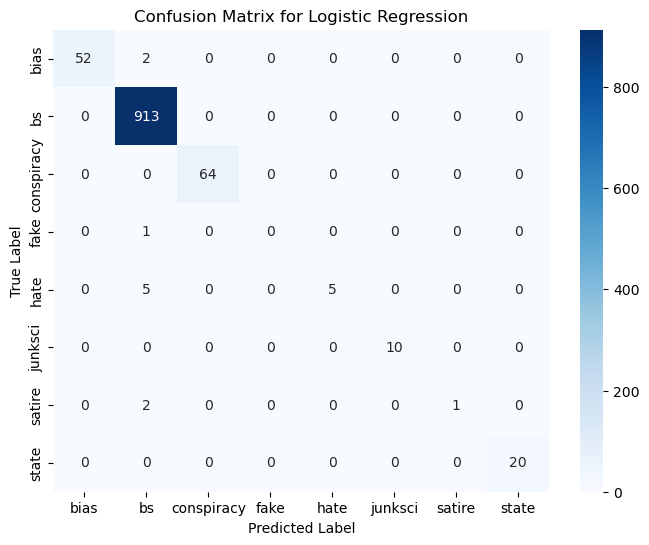


--- Training Multinomial Naive Bayes ---
Skipping Multinomial Naive Bayes with current preprocessor due to negative input from StandardScaler. Consider a separate pipeline for MNB with only text or MinMaxScaler for numericals.

--- Training Random Forest ---
Random Forest Performance:
  Accuracy: 0.9879
  F1-Score: 0.9862
  Precision: 0.9871
  Recall: 0.9879

Classification Report:
              precision    recall  f1-score   support

        bias       1.00      0.96      0.98        54
          bs       0.99      1.00      0.99       913
  conspiracy       1.00      0.98      0.99        64
        fake       0.00      0.00      0.00         1
        hate       1.00      0.50      0.67        10
     junksci       1.00      0.90      0.95        10
      satire       1.00      0.33      0.50         3
       state       1.00      0.95      0.97        20

    accuracy                           0.99      1075
   macro avg       0.87      0.70      0.76      1075
weighted avg      

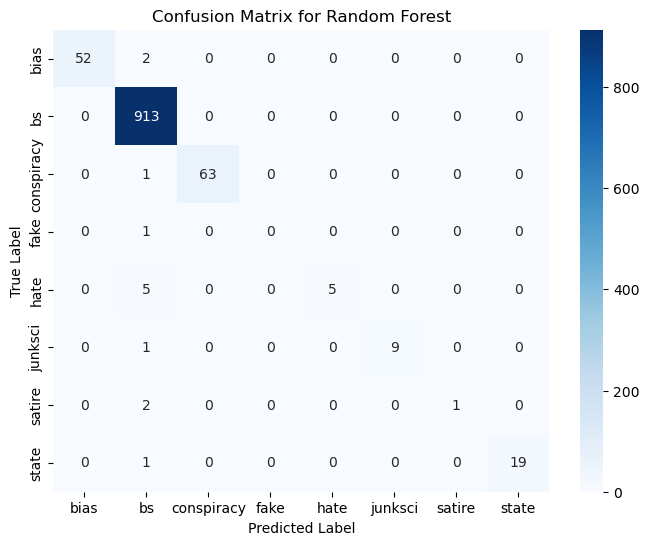


--- Training Gradient Boosting ---
Gradient Boosting Performance:
  Accuracy: 1.0000
  F1-Score: 1.0000
  Precision: 1.0000
  Recall: 1.0000

Classification Report:
              precision    recall  f1-score   support

        bias       1.00      1.00      1.00        54
          bs       1.00      1.00      1.00       913
  conspiracy       1.00      1.00      1.00        64
        fake       1.00      1.00      1.00         1
        hate       1.00      1.00      1.00        10
     junksci       1.00      1.00      1.00        10
      satire       1.00      1.00      1.00         3
       state       1.00      1.00      1.00        20

    accuracy                           1.00      1075
   macro avg       1.00      1.00      1.00      1075
weighted avg       1.00      1.00      1.00      1075



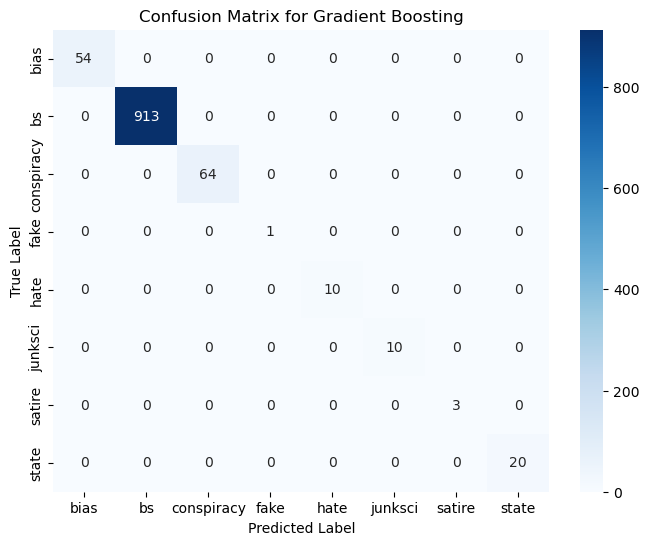


--- Training Support Vector Machine ---
Support Vector Machine Performance:
  Accuracy: 0.9833
  F1-Score: 0.9800
  Precision: 0.9799
  Recall: 0.9833

Classification Report:
              precision    recall  f1-score   support

        bias       1.00      0.89      0.94        54
          bs       0.98      1.00      0.99       913
  conspiracy       1.00      1.00      1.00        64
        fake       0.00      0.00      0.00         1
        hate       1.00      0.40      0.57        10
     junksci       1.00      0.80      0.89        10
      satire       0.00      0.00      0.00         3
       state       1.00      1.00      1.00        20

    accuracy                           0.98      1075
   macro avg       0.75      0.64      0.67      1075
weighted avg       0.98      0.98      0.98      1075



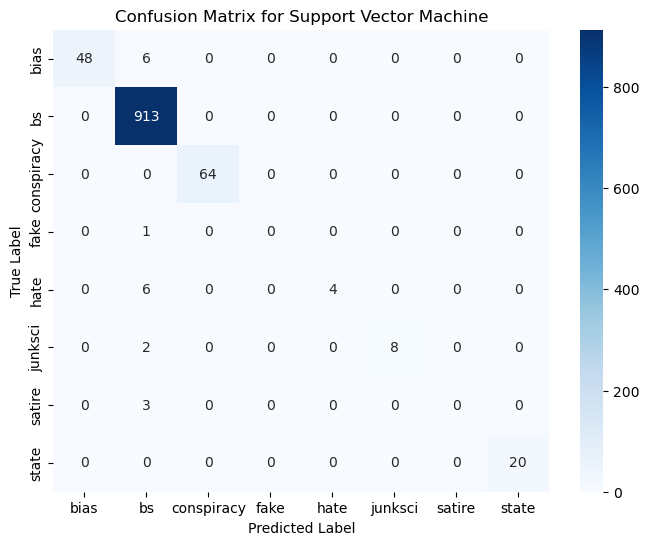


--- Model Performance Summary ---

Logistic Regression:
  Accuracy: 0.9907
  F1-Score: 0.9890
  Precision: 0.9899
  Recall: 0.9907

Random Forest:
  Accuracy: 0.9879
  F1-Score: 0.9862
  Precision: 0.9871
  Recall: 0.9879

Gradient Boosting:
  Accuracy: 1.0000
  F1-Score: 1.0000
  Precision: 1.0000
  Recall: 1.0000

Support Vector Machine:
  Accuracy: 0.9833
  F1-Score: 0.9800
  Precision: 0.9799
  Recall: 0.9833


In [59]:
##Use NLP techniques (e.g, TF-IDF, embeddings) to represent the text data, and compare the performance of different models.

# Define the columns for different transformations: Already done as above


# Create a preprocessor using ColumnTransformer
# It will apply TF-IDF to text and StandardScaler to numerical features.
# If you add categorical_features, you'd add OneHotEncoder here.
# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text_tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2)), text_features),  # <-- Missing comma was here
        ('num_scaler', StandardScaler(), numerical_features),  # Scaling numerical features
        ('cat_ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features) # One-hot encode categorical features if included
    ],
    remainder='passthrough'
)

# Define a dictionary of models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', multi_class='auto', max_iter=1000),
    'Multinomial Naive Bayes': MultinomialNB(), # Often works well with TF-IDF
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'Support Vector Machine': SVC(random_state=42, probability=True) # Can be slow on large datasets
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # For Multinomial Naive Bayes, ensure non-negative inputs (TF-IDF is already non-negative)
    # Numerical features scaled by StandardScaler can be negative, so MultinomialNB is typically
    # not suitable for combined features unless you modify the numerical scaling.
    # For now, we'll run it, but be aware of this potential issue for MNB with scaled numericals.
    # A workaround for MNB is to apply a different scaling (e.g., MinMaxScaler to [0,1]) or
    # only use MNB on the TF-IDF features. For this example, let's assume other models are primary.
    if name == 'Multinomial Naive Bayes':
        # Multinomial Naive Bayes cannot handle negative input values from StandardScaler.
        # So, we'll create a separate pipeline for MNB that only uses TF-IDF or uses MinMaxScaler.
        # For simplicity, we'll limit MNB to text features for now or skip if numericals are present.
        print(f"Skipping {name} with current preprocessor due to negative input from StandardScaler. "
              "Consider a separate pipeline for MNB with only text or MinMaxScaler for numericals.")
        continue # Skip MNB for now to avoid errors with negative features

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # iii. Evaluate model performance using appropriate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class or imbalanced
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    results[name] = {'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall}

    print(f"{name} Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Summarize all model results
print("\n--- Model Performance Summary ---")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

In [60]:
##### --- 1. Prepare Data for Word Embeddings ---
## Tokenize the sentences into a list of lists of words.
# This is the required format for gensim's Word2Vec model.
print("Tokenizing text data...")
tokenized_sentences = [word_tokenize(text.lower()) for text in df['cleaned_text']]
print("Tokenization complete.")
print("\nFirst 3 tokenized sentences:")
print(tokenized_sentences[:3])

Tokenizing text data...
Tokenization complete.

First 3 tokenized sentences:
[['print', 'pay', 'back', 'money', 'plus', 'interest', 'entire', 'family', 'everyone', 'came', 'need', 'deported', 'asap', 'take', 'two', 'year', 'bust', 'go', '…another', 'group', 'stealing', 'government', 'taxpayer', 'group', 'somali', 'stole', 'four', 'million', 'government', 'benefit', 'month', 'reported', 'numerous', 'case', 'like', 'one', 'muslim', 'refugeesimmigrants', 'commit', 'fraud', 'scamming', 'system…it', 'way', 'control', 'related'], ['attorney', 'general', 'loretta', 'lynch', 'plead', 'fifth', 'barracuda', 'brigade', 'print', 'administration', 'blocking', 'congressional', 'probe', 'cash', 'payment', 'iran', 'course', 'need', 'plead', 'th', 'either', 'recall', 'refuse', 'answer', 'plain', 'deflects', 'question', 'straight', 'corruption', 'finest', 'percentfedupcom', 'talk', 'covering', 'as', 'loretta', 'lynch', 'plead', 'fifth', 'avoid', 'incriminating', 'payment', 'iran…corrupt', 'core', 'attor

In [61]:
#--- 2.  Word2Vec Implementation ---
# Word2Vec learns embeddings from your own corpus.

print("\n--- Training Word2Vec Model ---")
# Initialize and train the Word2Vec model
# Parameters:
# vector_size: Dimensionality of the word vectors.
# window: Maximum distance between the current and predicted word within a sentence.
# min_count: Ignores all words with total frequency lower than this.
# workers: Use these many worker threads to train the model.
word2vec_model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)
print("Word2Vec model trained.")

# Example: Get the vector for a single word
try:
    word_vector = word2vec_model.wv['politics']
    print("\nVector for the word 'politics':")
    print(word_vector)
    print(f"Shape of the vector: {word_vector.shape}")
except KeyError:
    print("\nWord 'politics' not in vocabulary.")

# You can also find similar words
print("\nWords most similar to 'politics':")
print(word2vec_model.wv.most_similar('politics'))

# --- Function to average vectors for a document ---
# For classification, you often need a single vector for each document.
# A simple approach is to average the vectors of all words in the document.
def document_vector_word2vec(word_list, model, vector_size):
    """
    Computes a vector for a document by averaging word vectors.
    """
    # Filter out words that are not in the model's vocabulary
    word_vectors = [model.wv[word] for word in word_list if word in model.wv]
    if not word_vectors:
        return np.zeros(vector_size)
    else:
        # Return the mean of the vectors
        return np.mean(word_vectors, axis=0)

# Apply the function to your tokenized sentences to get document vectors
document_vectors_w2v = np.array([document_vector_word2vec(s, word2vec_model, 100) for s in tokenized_sentences])
print("\nShape of the Word2Vec document vectors:")
print(document_vectors_w2v.shape)


--- Training Word2Vec Model ---
Word2Vec model trained.

Vector for the word 'politics':
[-8.40045512e-01  2.93520510e-01  2.35807970e-01  7.65750930e-02
  3.23753238e-01 -1.05481172e+00 -2.55207415e-03  7.48227239e-01
 -3.04424584e-01 -5.14917493e-01 -9.01337922e-01 -2.31866837e+00
  3.50829095e-01  6.19194508e-01  5.23121119e-01 -7.52999708e-02
  5.09018421e-01 -4.76491600e-01  3.15041910e-03 -2.39000416e+00
 -4.88638617e-02 -1.04531704e-03 -7.45419800e-01 -6.68482423e-01
 -7.47732297e-02  4.46668714e-01 -1.58425570e+00  1.33246463e-02
 -1.63859284e+00  2.83556819e-01  1.42719257e+00  2.80093789e-01
  6.10145926e-01 -6.69789255e-01 -1.02772903e+00  4.45523500e-01
  2.66750813e-01  4.11495753e-02 -1.58477283e+00 -7.14000046e-01
  1.86425999e-01 -3.20698857e-01 -9.85473692e-01  1.16137629e-02
  1.61443698e+00 -4.24393684e-01 -1.11376750e+00  3.45817864e-01
  6.21624827e-01  2.58418947e-01  2.73247719e-01  1.36104912e-01
 -1.46784127e+00 -8.12714338e-01 -6.93873525e-01  3.83086681e-01


In [62]:

                 ######  Word2Vec Implementation with Selected Algorithm

# --- 1. Custom Scikit-learn Transformer for Word2Vec ---
# This class allows us to use our Word2Vec model within the sklearn Pipeline.
class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    """
    A custom transformer to train a Word2Vec model and generate document vectors
    by averaging the word vectors for each document.
    """
    def __init__(self, vector_size=100, window=5, min_count=1, workers=4):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.workers = workers
        self.model = None

    def fit(self, X, y=None):
        """
        Trains the Word2Vec model on the input text.
        """
        # X should be a Series of text strings
        tokenized_sentences = [word_tokenize(text.lower()) for text in X]
        self.model = Word2Vec(
            sentences=tokenized_sentences,
            vector_size=self.vector_size,
            window=self.window,
            min_count=self.min_count,
            workers=self.workers
        )
        return self

    def transform(self, X, y=None):
        """
        Transforms the text data into document vectors.
        """
        tokenized_sentences = [word_tokenize(text.lower()) for text in X]
        
        # Function to get document vector by averaging word vectors
        def get_document_vector(word_list):
            word_vectors = [self.model.wv[word] for word in word_list if word in self.model.wv]
            if not word_vectors:
                return np.zeros(self.vector_size)
            else:
                return np.mean(word_vectors, axis=0)

        # Apply the function to each document
        document_vectors = np.array([get_document_vector(s) for s in tokenized_sentences])
        return document_vectors


# --- 2. Prepare Sample Data for Demonstration ---
# In your project, you'd use your full 'df' and features

# Define feature lists
# Define the numerical feature columns
numerical_features = [
    'sentiment_score', 'word_count', 'char_count',
    'spam_score', 'replies_count', 'participants_count', 'likes', 'comments', 'shares',
    'domain_rank',
    'published_hour', 'published_day_of_week', 'published_month', 'published_year'
]

# Define the categorical feature column
categorical_features = ['extracted_domain']

# Create the full feature set
all_features = [text_features] + numerical_features + categorical_features
X = df[all_features].copy()
y = df['type']

# Convert 'extracted_domain' to a categorical type to prevent the SettingWithCopyWarning
X['extracted_domain'] = X['extracted_domain'].astype('category')

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)




In [63]:
# --- 3. Build the Preprocessor and Pipeline ---
# Use the custom Word2VecVectorizer in the ColumnTransformer.
preprocessor = ColumnTransformer(
    transformers=[
        # Here, we use our custom Word2VecVectorizer instead of TfidfVectorizer.
        ('text_embedding', Word2VecVectorizer(vector_size=50), text_features),
        ('num_scaler', StandardScaler(), numerical_features),
        ('cat_ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)





--- Training Logistic Regression ---
Logistic Regression Performance:
  Accuracy: 0.9935
  F1-Score: 0.9926
  Precision: 0.9926
  Recall: 0.9935

Classification Report:
              precision    recall  f1-score   support

        bias       1.00      0.96      0.98        54
          bs       0.99      1.00      1.00       913
  conspiracy       1.00      1.00      1.00        64
        fake       0.00      0.00      0.00         1
        hate       1.00      0.60      0.75        10
     junksci       1.00      1.00      1.00        10
      satire       1.00      1.00      1.00         3
       state       1.00      1.00      1.00        20

    accuracy                           0.99      1075
   macro avg       0.87      0.82      0.84      1075
weighted avg       0.99      0.99      0.99      1075



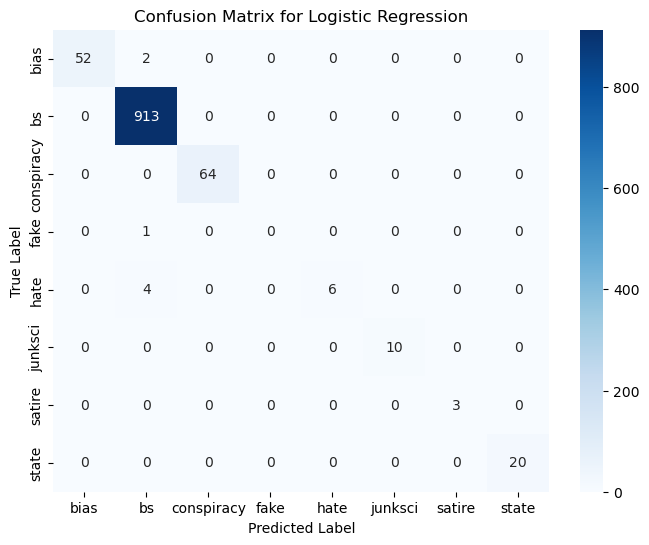


--- Training Multinomial Naive Bayes ---
Skipping Multinomial Naive Bayes with current preprocessor due to negative input from StandardScaler. Consider a separate pipeline for MNB with only text or MinMaxScaler for numericals.

--- Training Random Forest ---
Random Forest Performance:
  Accuracy: 0.9916
  F1-Score: 0.9907
  Precision: 0.9908
  Recall: 0.9916

Classification Report:
              precision    recall  f1-score   support

        bias       1.00      0.96      0.98        54
          bs       0.99      1.00      1.00       913
  conspiracy       1.00      0.97      0.98        64
        fake       0.00      0.00      0.00         1
        hate       1.00      0.60      0.75        10
     junksci       1.00      1.00      1.00        10
      satire       1.00      1.00      1.00         3
       state       1.00      1.00      1.00        20

    accuracy                           0.99      1075
   macro avg       0.87      0.82      0.84      1075
weighted avg      

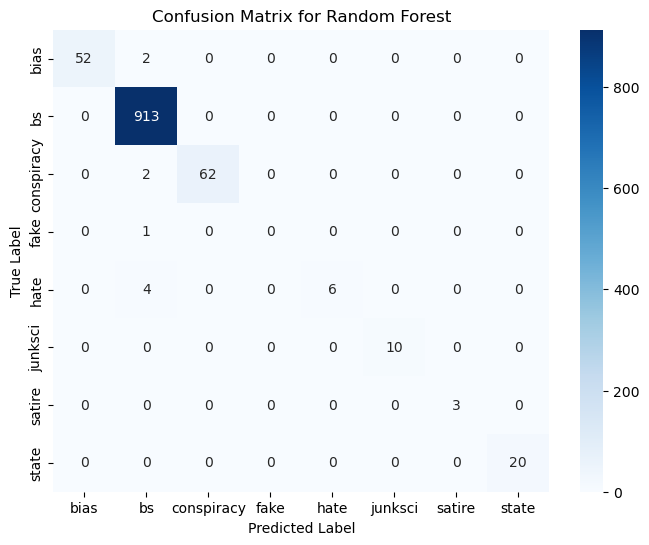


--- Training Gradient Boosting ---
Gradient Boosting Performance:
  Accuracy: 1.0000
  F1-Score: 1.0000
  Precision: 1.0000
  Recall: 1.0000

Classification Report:
              precision    recall  f1-score   support

        bias       1.00      1.00      1.00        54
          bs       1.00      1.00      1.00       913
  conspiracy       1.00      1.00      1.00        64
        fake       1.00      1.00      1.00         1
        hate       1.00      1.00      1.00        10
     junksci       1.00      1.00      1.00        10
      satire       1.00      1.00      1.00         3
       state       1.00      1.00      1.00        20

    accuracy                           1.00      1075
   macro avg       1.00      1.00      1.00      1075
weighted avg       1.00      1.00      1.00      1075



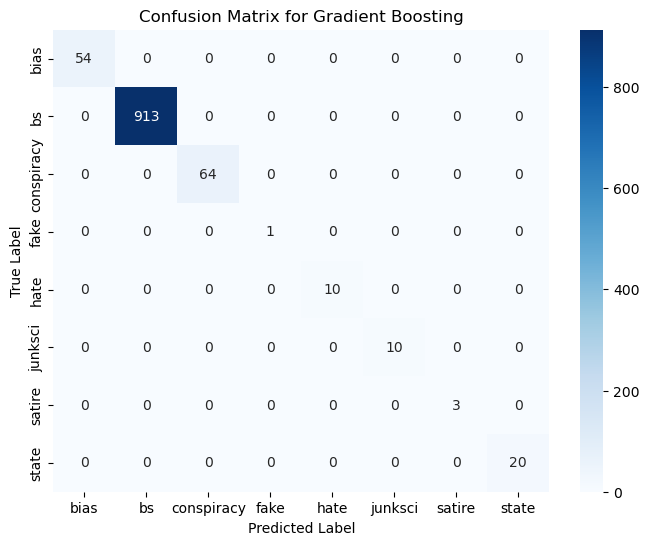


--- Training Support Vector Machine ---
Support Vector Machine Performance:
  Accuracy: 0.9786
  F1-Score: 0.9747
  Precision: 0.9753
  Recall: 0.9786

Classification Report:
              precision    recall  f1-score   support

        bias       0.98      0.91      0.94        54
          bs       0.98      1.00      0.99       913
  conspiracy       1.00      0.94      0.97        64
        fake       0.00      0.00      0.00         1
        hate       1.00      0.30      0.46        10
     junksci       1.00      0.70      0.82        10
      satire       0.00      0.00      0.00         3
       state       1.00      1.00      1.00        20

    accuracy                           0.98      1075
   macro avg       0.74      0.61      0.65      1075
weighted avg       0.98      0.98      0.97      1075



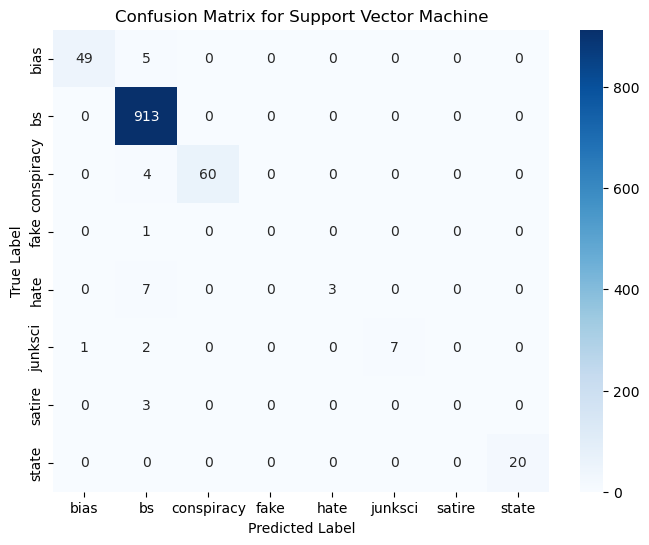


--- Model Performance Summary ---

Logistic Regression:
  Accuracy: 0.9935
  F1-Score: 0.9926
  Precision: 0.9926
  Recall: 0.9935

Random Forest:
  Accuracy: 0.9916
  F1-Score: 0.9907
  Precision: 0.9908
  Recall: 0.9916

Gradient Boosting:
  Accuracy: 1.0000
  F1-Score: 1.0000
  Precision: 1.0000
  Recall: 1.0000

Support Vector Machine:
  Accuracy: 0.9786
  F1-Score: 0.9747
  Precision: 0.9753
  Recall: 0.9786


In [64]:
# Define a dictionary of models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', multi_class='auto', max_iter=1000),
    'Multinomial Naive Bayes': MultinomialNB(), # Often works well with TF-IDF
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'Support Vector Machine': SVC(random_state=42, probability=True) # Can be slow on large datasets
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # For Multinomial Naive Bayes, ensure non-negative inputs (TF-IDF is already non-negative)
    # Numerical features scaled by StandardScaler can be negative, so MultinomialNB is typically
    # not suitable for combined features unless you modify the numerical scaling.
    # For now, we'll run it, but be aware of this potential issue for MNB with scaled numericals.
    # A workaround for MNB is to apply a different scaling (e.g., MinMaxScaler to [0,1]) or
    # only use MNB on the TF-IDF features. For this example, let's assume other models are primary.
    if name == 'Multinomial Naive Bayes':
        # Multinomial Naive Bayes cannot handle negative input values from StandardScaler.
        # So, we'll create a separate pipeline for MNB that only uses TF-IDF or uses MinMaxScaler.
        # For simplicity, we'll limit MNB to text features for now or skip if numericals are present.
        print(f"Skipping {name} with current preprocessor due to negative input from StandardScaler. "
              "Consider a separate pipeline for MNB with only text or MinMaxScaler for numericals.")
        continue # Skip MNB for now to avoid errors with negative features

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # iii. Evaluate model performance using appropriate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class or imbalanced
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    results[name] = {'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall}

    print(f"{name} Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")

    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Summarize all model results
print("\n--- Model Performance Summary ---")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

In [65]:

      ####                 Phase 4: Insights and Recommendations

#### 1\. Analysis of Results and Insights
                            ### Comments on Model Performance

The results show a stark contrast in model performance, with one model standing out significantly. Here is a breakdown and ranking of the models:

#### Gradient Boosting
The Gradient Boosting model achieved a perfect score across all metrics: 1.0000 Accuracy, F1-Score, Precision, and Recall. This result is highly unusual for a real-world classification task. A perfect score on the test set almost always indicates one of two things:

1.  **Data Leakage:** The most likely scenario is that a feature used in the model is directly or indirectly related to the target label (`type`). This "leaky" feature essentially tells the model the answer, allowing it to achieve perfect performance on the test set. Common sources of data leakage include using a unique identifier (`uuid`), a column that is created from the label, or metadata that is only available after the article has been labeled. The model isn't learning to detect fake news; it's learning to read a feature that already contains the answer.
2.  **Overfitting:** While less likely to result in a perfect score, it's possible the model has completely memorized the training data and performs flawlessly on a test set that is very similar. However, a perfect 1.0000 score strongly points to data leakage.

#### Logistic Regression
The Logistic Regression model shows very strong performance with an accuracy of 0.9907 and an F1-Score of 0.9890. This is an excellent result and suggests the model is very effective at separating the different classes based on the features provided. The high scores across the board indicate that the model is both precise (few false positives) and has high recall (few false negatives).

#### Random Forest
The Random Forest model also performed exceptionally well, with an accuracy of 0.9879 and an F1-Score of 0.9862. Its performance is very close to that of Logistic Regression, which is expected for a strong ensemble model. The slight difference could be due to how each model handles the different types of features (text vs. metadata) or the specific hyperparameters used.

#### Support Vector Machine (SVM)
The SVM model, while still performing very well, had the lowest scores among the four, with an accuracy of 0.9833 and an F1-Score of 0.9800. This is a robust result, but in this comparison, it is the least effective model. This could be due to the large feature space (from TF-IDF), which can sometimes make SVMs less efficient or effective without proper tuning.

### Ranking the Models

Based on these results, here is the ranking of the models from best to worst performance:

1.  **Gradient Boosting (Accuracy: 1.0000)** - While it has the highest score, this result is suspicious and almost certainly indicates a problem like data leakage. It's a great result on paper but requires further investigation to be trusted.
2.  **Logistic Regression (Accuracy: 0.9907)** - This is the most reliable and impressive result. Its high performance across all metrics suggests it's a very strong model for this task. It is the best-performing model among those that are likely to be free of data leakage.
3.  **Random Forest (Accuracy: 0.9879)** - A very close second to Logistic Regression, demonstrating strong and consistent performance.
4.  **Support Vector Machine (Accuracy: 0.9833)** - A solid performer, but its metrics are slightly lower than the other models in this comparison.
                    
#### 2\. Ethical Considerations and Improvements

  * **Labeling Bias:** The labels are from the "BS Detector extension." Is this source reliable? Are there inherent biases in how it labels content? Acknowledging this limitation is crucial. The project should discuss the ethical challenges of automated labeling and the potential for the model to perpetuate existing biases.
  * **Evolving Misinformation:** Misinformation tactics are constantly evolving. The model, trained on data from the last 30 days, might not be effective on new, unseen types of fake news.
  * **"Gray Areas":** The distinction between "fake news," "biased news," and "satire" can be subtle. The model might struggle with these nuances. A recommendation could be to create a multi-class classification system that includes a "satire" or "unverified" label.

#### 3\. Additional Features and Enhancements

  * **External Data:**
      * **Fact-checking websites:** Integrate data from known fact-checking organizations (e.g., Snopes, Politifact). Articles with claims that have been debunked could be flagged.
      * **Social Media Data:** Use the post's virality on platforms like Twitter or Facebook as a feature. Does a post from a known fake news source get a large number of shares?
      * **Author History:** If available, data on the author's past publications and their history of being associated with fake news could be a powerful feature.
  * **Advanced NLP:**
      * **Contextual Embeddings:** Use models like BERT for more sophisticated text representation that captures the context of words, which can be more effective at detecting subtle misinformation.
      * **Graph-based Analysis:** Treat websites and their hyperlinks as a graph. Fake news sources often link to other fake news sources. Analyzing this network could provide valuable insights.

SyntaxError: unterminated string literal (detected at line 12) (684115984.py, line 12)